## Import libraries and dataset

In [50]:
import pandas as pd
import nltk
from nltk.tokenize import *
from nltk.corpus import stopwords
import datetime
import numpy as np

In [2]:
df = pd.read_json('goodreads_reviews_children.json', lines= True)

## Filter dataset for the Top 10 most reviewed

In [3]:
book_selection = df.groupby('book_id').size().reset_index()
book_selection = book_selection.rename(columns = {0:'value_count'}).sort_values('value_count', ascending = False)
print(book_selection.head(20))
book_selection = book_selection['book_id'][:10]

         book_id  value_count
88          3636         6156
0              5         4696
74564   11387515         4499
4678      157993         3114
2403       78411         1999
70142    9673436         1947
323         8127         1721
9794      370493         1697
75083   11594337         1575
54          2998         1524
1341       38709         1450
818        24178         1449
1399       39988         1387
104579  23302416         1351
10257     389627         1320
89750   17349203         1288
6662      236093         1184
14           378         1115
43          2839         1065
2562       83369         1058


In [4]:
#Subset all reviews for the top 10 books

df = df[df['book_id'].isin(book_selection)]
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
46,7b2e5fe9fd353fecf3eeebb4850b88d3,11594337,0cef00e7ac5b37c459c94083475413f7,5,"great story, heartwarming and very current wit...",Sat Jan 05 17:30:28 -0800 2013,Sun Jan 27 19:35:53 -0800 2013,,,0,0
54,0ef32090550901ead25cb0ea21c4d36b,157993,f379671d83939b72314ef2439d44e372,4,I read this in French during high school (Fren...,Wed Nov 21 16:45:09 -0800 2012,Wed Nov 21 16:45:46 -0800 2012,,,0,0
63,d37b46b2190ed7c518259f29b47a9b36,3636,ac7aae56c65adfde94bb8a9e653f67d3,5,A quick but engrossing dystopian novel. The re...,Thu Mar 30 11:33:22 -0700 2017,Thu Mar 30 18:10:44 -0700 2017,Thu Mar 30 00:00:00 -0700 2017,Wed Mar 29 00:00:00 -0700 2017,4,0
70,f4c6fe33ef61c38f7f4aeb5224c259a5,11387515,13f03d0906f27f5202865787efdf1bbc,4,I love how simple the story was told but the m...,Sun Nov 04 00:40:58 -0700 2012,Mon Nov 12 04:14:02 -0800 2012,Mon Nov 12 04:14:02 -0800 2012,Sun Nov 04 00:00:00 -0700 2012,0,0
71,f4c6fe33ef61c38f7f4aeb5224c259a5,157993,45c234cd783da040e9da8c3e81df0297,5,We should see with our hearts not with our eye...,Fri Nov 02 07:37:50 -0700 2012,Fri Apr 26 06:56:47 -0700 2013,,,1,0


In [5]:
# Filter for dataset containing only review text and user given rating

df1 = pd.DataFrame(df, columns=['book_id', 'rating', 'review_text'])
df1.head()

,book_id,rating,review_text
46,11594337,5,"great story, heartwarming and very current wit..."
54,157993,4,I read this in French during high school (Fren...
63,3636,5,A quick but engrossing dystopian novel. The re...
70,11387515,4,I love how simple the story was told but the m...
71,157993,5,We should see with our hearts not with our eye...


## Data Pre-processing

1. Removal of weblinks
2. Sentence tokenization using nltk
3. Sentence tokenization using spacy

In [6]:
# Removal of Weblinks, hashtags & mentions

def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text = re.sub(r'\S+\.com\S+','',text) #remove urls
    text = re.sub(r'\@\w+','',text) #remove mentions
    text = re.sub(r'\#\w+','',text) #remove hashtags
    return text

df1['review_xlink'] = df1['review_text'].apply(lambda x: remove_content(x))

## Sentiment Analysis

### 1. Vader
Compound VADER scores for analyzing sentiment
The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence.

As explained in the paper, researchers used below normalization.

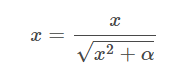

where x = sum of valence scores of constituent words, and α = Normalization constant (default value is 15)

In [ ]:
# !pip install vaderSentiment

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [8]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [9]:
# Add column to include polarity score

df1['vader_scores'] = df1['review_xlink'].apply(lambda review_xlink: analyser.polarity_scores(review_xlink))
df1.head()

,book_id,rating,review_text,review_xlink,vader_scores
46,11594337,5,"great story, heartwarming and very current wit...","great story, heartwarming and very current wit...","{'neg': 0.054, 'neu': 0.643, 'pos': 0.303, 'co..."
54,157993,4,I read this in French during high school (Fren...,I read this in French during high school (Fren...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
63,3636,5,A quick but engrossing dystopian novel. The re...,A quick but engrossing dystopian novel. The re...,"{'neg': 0.145, 'neu': 0.655, 'pos': 0.2, 'comp..."
70,11387515,4,I love how simple the story was told but the m...,I love how simple the story was told but the m...,"{'neg': 0.116, 'neu': 0.658, 'pos': 0.226, 'co..."
71,157993,5,We should see with our hearts not with our eye...,We should see with our hearts not with our eye...,"{'neg': 0.011, 'neu': 0.825, 'pos': 0.164, 'co..."


In [10]:
# Add column to extract compound score

df1['vader_comp']  = df1['vader_scores'].apply(lambda score_dict: score_dict['compound'])
df1.head()

,book_id,rating,review_text,review_xlink,vader_scores,vader_comp
46,11594337,5,"great story, heartwarming and very current wit...","great story, heartwarming and very current wit...","{'neg': 0.054, 'neu': 0.643, 'pos': 0.303, 'co...",0.8834
54,157993,4,I read this in French during high school (Fren...,I read this in French during high school (Fren...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
63,3636,5,A quick but engrossing dystopian novel. The re...,A quick but engrossing dystopian novel. The re...,"{'neg': 0.145, 'neu': 0.655, 'pos': 0.2, 'comp...",0.3549
70,11387515,4,I love how simple the story was told but the m...,I love how simple the story was told but the m...,"{'neg': 0.116, 'neu': 0.658, 'pos': 0.226, 'co...",0.9654
71,157993,5,We should see with our hearts not with our eye...,We should see with our hearts not with our eye...,"{'neg': 0.011, 'neu': 0.825, 'pos': 0.164, 'co...",0.9436


In [11]:
# Apply label in a new column

df1['vader_sentiment'] = df1['vader_comp'].apply(lambda c: 'pos' if c >=0.3 else 'neg' if c<= -0.3 else 'neutral')
df1.head()

,book_id,rating,review_text,review_xlink,vader_scores,vader_comp,vader_sentiment
46,11594337,5,"great story, heartwarming and very current wit...","great story, heartwarming and very current wit...","{'neg': 0.054, 'neu': 0.643, 'pos': 0.303, 'co...",0.8834,pos
54,157993,4,I read this in French during high school (Fren...,I read this in French during high school (Fren...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
63,3636,5,A quick but engrossing dystopian novel. The re...,A quick but engrossing dystopian novel. The re...,"{'neg': 0.145, 'neu': 0.655, 'pos': 0.2, 'comp...",0.3549,pos
70,11387515,4,I love how simple the story was told but the m...,I love how simple the story was told but the m...,"{'neg': 0.116, 'neu': 0.658, 'pos': 0.226, 'co...",0.9654,pos
71,157993,5,We should see with our hearts not with our eye...,We should see with our hearts not with our eye...,"{'neg': 0.011, 'neu': 0.825, 'pos': 0.164, 'co...",0.9436,pos


In [12]:
# Apply label in a new column

df1['user_sentiment'] = df1['rating'].apply(lambda rating: 'pos' if rating >=4 else 'neg' if rating <= 2 else 'neutral')
df1.head()

,book_id,rating,review_text,review_xlink,vader_scores,vader_comp,vader_sentiment,user_sentiment
46,11594337,5,"great story, heartwarming and very current wit...","great story, heartwarming and very current wit...","{'neg': 0.054, 'neu': 0.643, 'pos': 0.303, 'co...",0.8834,pos,pos
54,157993,4,I read this in French during high school (Fren...,I read this in French during high school (Fren...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,pos
63,3636,5,A quick but engrossing dystopian novel. The re...,A quick but engrossing dystopian novel. The re...,"{'neg': 0.145, 'neu': 0.655, 'pos': 0.2, 'comp...",0.3549,pos,pos
70,11387515,4,I love how simple the story was told but the m...,I love how simple the story was told but the m...,"{'neg': 0.116, 'neu': 0.658, 'pos': 0.226, 'co...",0.9654,pos,pos
71,157993,5,We should see with our hearts not with our eye...,We should see with our hearts not with our eye...,"{'neg': 0.011, 'neu': 0.825, 'pos': 0.164, 'co...",0.9436,pos,pos


In [13]:
from textblob import TextBlob

In [14]:
# Repeat sentiment analysis using TextBlob
# Apply results to confusion matrix


def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
df1['TextBlob_Subjectivity'] = df1['review_xlink'].apply(getSubjectivity)
df1 ['TextBlob_Polarity'] = df1['review_xlink'].apply(getPolarity)
 
#def getAnalysis(score):
#    if score < 0:
#        return 'Negative'
#    elif score == 0:
#        return 'Neutral'
#    else:
#        return 'Positive'
#    df1['blob_score'] = df1['TextBlob_Polarity'].apply(getAnalysis)
#    return df1


In [15]:
df1['TB_sentiment'] = df1['TextBlob_Polarity'].apply(lambda rating: 'pos' if rating >=0.3 else 'neg' if rating <= -0.3 else 'neutral')
df1.head()

,book_id,rating,review_text,review_xlink,vader_scores,vader_comp,vader_sentiment,user_sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TB_sentiment
46,11594337,5,"great story, heartwarming and very current wit...","great story, heartwarming and very current wit...","{'neg': 0.054, 'neu': 0.643, 'pos': 0.303, 'co...",0.8834,pos,pos,0.612143,0.453571,pos
54,157993,4,I read this in French during high school (Fren...,I read this in French during high school (Fren...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,pos,0.180000,0.053333,neutral
63,3636,5,A quick but engrossing dystopian novel. The re...,A quick but engrossing dystopian novel. The re...,"{'neg': 0.145, 'neu': 0.655, 'pos': 0.2, 'comp...",0.3549,pos,pos,0.545238,0.104762,neutral
70,11387515,4,I love how simple the story was told but the m...,I love how simple the story was told but the m...,"{'neg': 0.116, 'neu': 0.658, 'pos': 0.226, 'co...",0.9654,pos,pos,0.504185,0.176768,neutral
71,157993,5,We should see with our hearts not with our eye...,We should see with our hearts not with our eye...,"{'neg': 0.011, 'neu': 0.825, 'pos': 0.164, 'co...",0.9436,pos,pos,0.683333,0.055729,neutral


In [16]:
# Apply code to calculate confusion matrix between Vader score and user score
# find accuracy, precision, recall:

from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(df1['vader_sentiment'],df1['user_sentiment'])

array([[  476,   340,  1151],
       [  525,   699,  3524],
       [  964,  2036, 19213]], dtype=int64)

In [17]:
print(classification_report(df1['vader_sentiment'],df1['user_sentiment']))

              precision    recall  f1-score   support

         neg       0.24      0.24      0.24      1967
     neutral       0.23      0.15      0.18      4748
         pos       0.80      0.86      0.83     22213

    accuracy                           0.70     28928
   macro avg       0.42      0.42      0.42     28928
weighted avg       0.67      0.70      0.69     28928



In [18]:
# Compare TextBlob polarity score against user score

confusion_matrix(df1['TB_sentiment'],df1['user_sentiment'])

array([[  165,    55,   238],
       [ 1352,  2165, 13014],
       [  448,   855, 10636]], dtype=int64)

In [19]:
print(classification_report(df1['TB_sentiment'],df1['user_sentiment']))

              precision    recall  f1-score   support

         neg       0.08      0.36      0.14       458
     neutral       0.70      0.13      0.22     16531
         pos       0.45      0.89      0.59     11939

    accuracy                           0.45     28928
   macro avg       0.41      0.46      0.32     28928
weighted avg       0.59      0.45      0.37     28928



In [20]:
# Sample review 1

print(df1.iloc[512,3])
print("User rating is",df1.iloc[512,1])
print("Vader polarity score is",df1.iloc[512,5])
print("TextBlob polarity score is",df1.iloc[512,9])

A MUST READ for parents & educators, it demonstrates how a bullied child feels & how one member of the family can affect the whole that takes you on a rollercoaster of emotions.
User rating is 4
Vader polarity score is -0.6249
TextBlob polarity score is 0.2


In [21]:
# Sentiment score (TextBlob) sentence by sentence

sent1 = "A MUST READ for parents & educators." 
print(getPolarity(sent1))

sent2 = "it demonstrates how a bullied child feels"
print(getPolarity(sent2))

sent3 = "how one member of the family can affect the whole that takes you on a rollercoaster of emotions"
print(getPolarity(sent3))



0.0
0.0
0.2


In [22]:
# Sentiment score (Vader) sentence by sentence

sent1 = "A MUST READ for parents & educators." 
sentiment_analyzer_scores(sent1)

sent2 = "it demonstrates how a bullied child feels"
sentiment_analyzer_scores(sent2)

sent3 = "how one member of the family can affect the whole that takes you on a rollercoaster of emotions"
sentiment_analyzer_scores(sent3)

A MUST READ for parents & educators.---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
it demonstrates how a bullied child feels {'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'compound': -0.6249}
how one member of the family can affect the whole that takes you on a rollercoaster of emotions {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [23]:
# Sample review 2

print(df1.iloc[4,3])
print("User rating is",df1.iloc[4,1])
print("Vader polarity score is",df1.iloc[4,5])
print("TextBlob polarity score is",df1.iloc[4,9])

We should see with our hearts not with our eyes. This is the lesson I've learned from reading The Little Prince. I was convinced to read this book because my favorite professor, Sir Elson, told me that this was his favorite book. I've been hearing about this book and I was expecting it to be thick and in hard bound. But to my surprise, it was just thin. You can finish reading it in a couple of hours. I love that there were illustrations! It teaches a lot of lessons. Such an awe-inspiring book.
User rating is 5
Vader polarity score is 0.9436
TextBlob polarity score is 0.055729166666666656


In [25]:
# Sentiment score (TextBlob) sentence by sentence

sent1 = "We should see with our hearts not with our eyes." 
print(getPolarity(sent1))

sent2 = "This is the lesson I've learned from reading The Little Prince."
print(getPolarity(sent2))

sent3 = "I was convinced to read this book because my favorite professor, Sir Elson, told me that this was his favorite book."
print(getPolarity(sent3))

sent4 = "I've been hearing about this book and I was expecting it to be thick and in hard bound."
print(getPolarity(sent4))

sent5 = "But to my surprise, it was just thin."
print(getPolarity(sent5))

sent6 = "You can finish reading it in a couple of hours."
print(getPolarity(sent6))

sent7 = "I love that there were illustrations!"
print(getPolarity(sent7))

sent8 = "It teaches a lot of lessons."
print(getPolarity(sent8))

sent9 = "Such an awe-inspiring book."
print(getPolarity(sent9))

0.0
-0.1875
0.5
-0.2958333333333334
-0.4
0.0
0.625
0.0
0.0


In [24]:
# Sentiment score (Vader) sentence by sentence

sent1 = "We should see with our hearts not with our eyes."  
print(sentiment_analyzer_scores(sent1))

sent2 = "This is the lesson I've learned from reading The Little Prince."
print(sentiment_analyzer_scores(sent2))

sent3 = "I was convinced to read this book because my favorite professor, Sir Elson, told me that this was his favorite book."
print(sentiment_analyzer_scores(sent3))

sent4 = "I've been hearing about this book and I was expecting it to be thick and in hard bound."
print(sentiment_analyzer_scores(sent4))

sent5 = "But to my surprise, it was just thin."
print(sentiment_analyzer_scores(sent5))

sent6 = "You can finish reading it in a couple of hours."
print(sentiment_analyzer_scores(sent6))

sent7 = "I love that there were illustrations!"
print(sentiment_analyzer_scores(sent7))

sent8 = "It teaches a lot of lessons."
print(sentiment_analyzer_scores(sent8))

sent9 = "Such an awe-inspiring book."
print(sentiment_analyzer_scores(sent9))

We should see with our hearts not with our eyes. {'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.6486}
None
This is the lesson I've learned from reading The Little Prince. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
I was convinced to read this book because my favorite professor, Sir Elson, told me that this was his favorite book. {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.8271}
None
I've been hearing about this book and I was expecting it to be thick and in hard bound. {'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'compound': -0.1027}
None
But to my surprise, it was just thin.--- {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.3919}
None
You can finish reading it in a couple of hours. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
I love that there were illustrations!--- {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.6696}
None
It teaches a lot of lessons.------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Suc

In [26]:
# Example to find avearge of list
from numpy import mean

avg_vader = mean(df1['vader_comp'])
print("The average Vader polarity score of the dataset is", round(avg_vader,2))

avg_tb = mean(df1['TextBlob_Polarity'])
print("The average TextBlob polarity score of the dataset is", round(avg_tb,2))


The average Vader polarity score of the dataset is 0.56
The average TextBlob polarity score of the dataset is 0.27


In [27]:
# Numerical scores

df2 = pd.DataFrame(df1, columns=['book_id', 'vader_comp',  'rating', 'TextBlob_Polarity'])
df2.head()


,book_id,vader_comp,rating,TextBlob_Polarity
46,11594337,0.8834,5,0.453571
54,157993,0.0000,4,0.053333
63,3636,0.3549,5,0.104762
70,11387515,0.9654,4,0.176768
71,157993,0.9436,5,0.055729


In [28]:
# Visualise results for all 3

df2_results = df2.groupby('book_id',sort=True).mean()
results = df2_results.sort_values('rating', ascending = False)
print(results)


          vader_comp    rating  TextBlob_Polarity
book_id                                          
5           0.516318  4.596465           0.305492
11387515    0.690078  4.505668           0.300365
11594337    0.693884  4.393651           0.304830
8127        0.668560  4.350959           0.294144
157993      0.479458  4.234104           0.213245
9673436     0.720200  4.224961           0.349500
2998        0.580946  4.127297           0.275606
3636        0.529023  4.003086           0.242607
370493      0.367304  3.982322           0.231196
78411       0.437195  3.764882           0.194168


<Figure size 432x288 with 0 Axes>

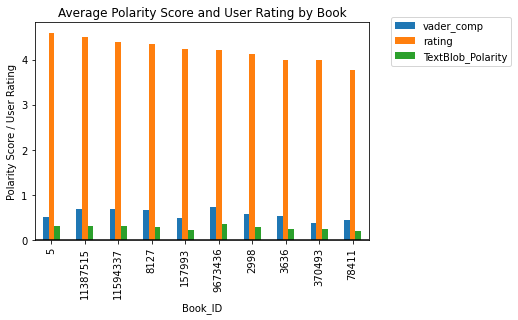

In [29]:
import matplotlib.pyplot as plt

plt.figure();

results.iloc[:,0:3].plot.bar()

plt.axhline(0, color="k")
plt.xlabel("Book_ID")
plt.ylabel("Polarity Score / User Rating")
plt.title("Average Polarity Score and User Rating by Book")

legend = plt.legend()
legend.get_frame().set_edgecolor('1.0')

plt.legend(loc = 'best', bbox_to_anchor=(1.05, 1.05))

# User rating sorted in decreasing order
# We can observe that vader and textblob polarity scores does not move in a similar pattern

In [30]:
# Applying the findings to business objective - users to get an idea of overall sentiment for a particular book
# Filter analysis results by book id '9673436' and extract results for this book

df3 = df1[df1['book_id']==9673436]
df3.head()

,book_id,rating,review_text,review_xlink,vader_scores,vader_comp,vader_sentiment,user_sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TB_sentiment
338,9673436,5,Great kid's book. Loved the pictures too,Great kid's book. Loved the pictures too,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.8402,pos,pos,0.775000,0.750000,pos
415,9673436,3,"My three year old loved, LOVED, this book so m...","My three year old loved, LOVED, this book so m...","{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.9205,pos,neutral,0.508000,0.372000,pos
2225,9673436,5,Such an amazing book- it's worth all the accla...,Such an amazing book- it's worth all the accla...,"{'neg': 0.019, 'neu': 0.6, 'pos': 0.381, 'comp...",0.9883,pos,pos,0.665000,0.455000,pos
2915,9673436,3,I always wonder how much of books like these a...,I always wonder how much of books like these a...,"{'neg': 0.036, 'neu': 0.732, 'pos': 0.232, 'co...",0.9537,pos,neutral,0.417045,0.188447,neutral
2993,9673436,4,The juxtaposition prose/pictures made this boo...,The juxtaposition prose/pictures made this boo...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.7063,pos,pos,0.833333,0.566667,pos


In [32]:
# Print confusion matrix for book id '9673436'
# comparing user rating and vader compound score

confusion_matrix(df3['vader_sentiment'],df3['user_sentiment'])
print(classification_report(df3['vader_sentiment'],df3['user_sentiment']))

              precision    recall  f1-score   support

         neg       0.10      0.18      0.13        50
     neutral       0.10      0.12      0.11       188
         pos       0.90      0.85      0.87      1709

    accuracy                           0.76      1947
   macro avg       0.36      0.38      0.37      1947
weighted avg       0.80      0.76      0.78      1947



In [33]:
# Print confusion matrix for book id '9673436'
# comparing user rating and TextBlob polarity score

confusion_matrix(df3['TB_sentiment'],df3['user_sentiment'])
print(classification_report(df3['TB_sentiment'],df3['user_sentiment']))

              precision    recall  f1-score   support

         neg       0.04      0.67      0.08         6
     neutral       0.54      0.15      0.23       869
         pos       0.58      0.88      0.70      1072

    accuracy                           0.55      1947
   macro avg       0.39      0.56      0.34      1947
weighted avg       0.56      0.55      0.49      1947



In [34]:
# Example to find avearge scores for book id '9673436'
from numpy import mean

avg_vader = mean(df3['vader_comp'])
print("The average Vader polarity score of the dataset is", round(avg_vader,2))

avg_tb = mean(df3['TextBlob_Polarity'])
print("The average TextBlob polarity score of the dataset is", round(avg_tb,2))


The average Vader polarity score of the dataset is 0.72
The average TextBlob polarity score of the dataset is 0.35


In [35]:
# Numerical scores

df4 = pd.DataFrame(df3, columns=['book_id', 'rating', 'vader_comp', 'TextBlob_Polarity'])
df4.head()


,book_id,rating,vader_comp,TextBlob_Polarity
338,9673436,5,0.8402,0.750000
415,9673436,3,0.9205,0.372000
2225,9673436,5,0.9883,0.455000
2915,9673436,3,0.9537,0.188447
2993,9673436,4,0.7063,0.566667


           rating  vader_comp  TextBlob_Polarity
book_id                                         
9673436  4.224961      0.7202             0.3495


<Figure size 432x288 with 0 Axes>

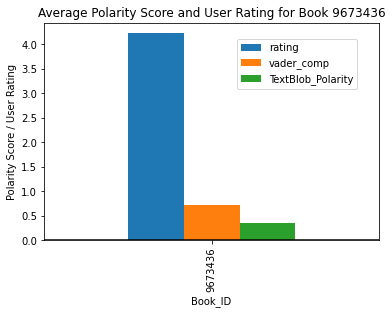

In [62]:
df4_results = df4.groupby('book_id',sort=True).mean()
results = df4_results.sort_values('rating', ascending = False)
print(results)
        
plt.figure();

results.iloc[:,0:3].plot.bar()

plt.axhline(0, color="k")
plt.xlabel("Book_ID")
plt.ylabel("Polarity Score / User Rating")
plt.title("Average Polarity Score and User Rating for Book 9673436")

legend = plt.legend()
legend.get_frame().set_edgecolor('1.0')

plt.legend(loc = 'best', bbox_to_anchor=(0.95, 0.95))

In [37]:
# Sample review 1 for book id 9673436

print(df3.iloc[1,3])
print("User rating is",df1.iloc[1,1])
print("Vader polarity score is",df1.iloc[1,5])
print("TextBlob polarity score is",df1.iloc[1,9])

My three year old loved, LOVED, this book so much that afterwards we started role playing, with me as the Station Inspector and him as Hugo Cabret. 
 Highly recommend.
User rating is 4
Vader polarity score is 0.0
TextBlob polarity score is 0.05333333333333334


In [38]:
# Sample review 2 for book id 9673436

print(df3.iloc[4,3])
print("User rating is",df1.iloc[4,1])
print("Vader polarity score is",df1.iloc[4,5])
print("TextBlob polarity score is",df1.iloc[4,9])

The juxtaposition prose/pictures made this book really magical and charming ... if I had a kid, this would be at the top of my list to read him/her.
User rating is 5
Vader polarity score is 0.9436
TextBlob polarity score is 0.055729166666666656
